# openPMD beamphysics examples

In [1]:
# Nicer plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8,4)

# Basic Usage

In [2]:
from pmd_beamphysics import ParticleGroup

In [3]:
P = ParticleGroup( 'data/bmad_particles2.h5')
P

<ParticleGroup with 100000 particles at 0x7fb5315da1c0>

In [4]:
P.energy

array([8.00032916e+09, 7.97408124e+09, 7.97338447e+09, ...,
       7.97531701e+09, 7.97163591e+09, 7.97170403e+09])

In [5]:
P['mean_energy'], P.units('mean_energy')

(np.float64(7974939710.08345),
 pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0)))

In [6]:
P.where(P.x < P['mean_x'])

<ParticleGroup with 50082 particles at 0x7fb578963d90>

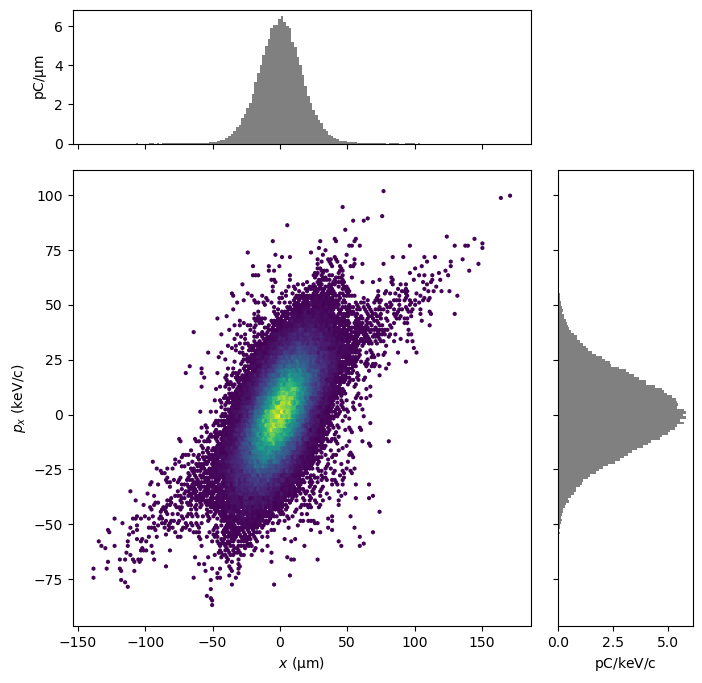

In [7]:
a = P.plot('x', 'px', figsize=(8,8))

In [8]:
P.write_elegant('elegant_particles.txt', verbose=True)

writing 100000 particles to elegant_particles.txt


# ParticleGroup class

x positions, in meters

In [9]:
P.x

array([-1.20890504e-05,  2.50055966e-05,  1.84022924e-06, ...,
       -1.87135206e-06,  1.19494768e-06, -1.04551798e-05])

relativistic gamma, calculated on the fly

In [10]:
P.gamma

array([15656.25362205, 15604.88772858, 15603.52416601, ...,
       15607.30607107, 15600.10233296, 15600.23563914])

Both are allowed

In [11]:
len(P), P['n_particle']

(100000, 100000)

## Basic Statistics

Statistics on any of these. Note that these properly use the .weight array.

In [12]:
P.avg('gamma'), P.std('p')

(np.float64(15606.56770446094), np.float64(7440511.955100455))

Covariance matrix of any list of keys

In [13]:
P.cov('x', 'px', 'y', 'kinetic_energy')

array([[ 3.05290090e-10,  1.93582323e-01,  2.14462846e-12,
        -3.94841065e+00],
       [ 1.93582323e-01,  3.26525376e+08, -2.44058325e-05,
        -5.36815277e+08],
       [ 2.14462846e-12, -2.44058325e-05,  4.71979014e-10,
        -8.48100957e-01],
       [-3.94841065e+00, -5.36815277e+08, -8.48100957e-01,
         5.53617715e+13]])

These can all be accessed with brackets. sigma_ and mean_ are also allowed

In [14]:
P['sigma_x'], P['sigma_energy'], P['min_y'], P['norm_emit_x'], P['norm_emit_4d']

(np.float64(1.7472465109340715e-05),
 np.float64(7440511.939853717),
 np.float64(-0.00017677380499644412),
 np.float64(4.881047612307434e-07),
 np.float64(2.4484888474798633e-13))

Covariance has a special syntax, items separated by __

In [15]:
P['cov_x__kinetic_energy']

np.float64(-3.9484106461190627)

n-dimensional histogram. This is a wrapper for `numpy.histogramdd`

In [16]:
H, edges = P.histogramdd('t', 'delta_pz', bins=(5,10))
H.shape, edges

((5, 10),
 [array([5.16387938e-06, 5.16387943e-06, 5.16387948e-06, 5.16387953e-06,
         5.16387958e-06, 5.16387963e-06]),
  array([-24476455.61834908, -17729298.92490654, -10982142.231464  ,
          -4234985.53802147,   2512171.15542107,   9259327.8488636 ,
          16006484.54230614,  22753641.23574867,  29500797.92919121,
          36247954.62263375,  42995111.31607628])])

## Slice statistics

ParticleGroup can be sliced along one dimension into chunks of an equal number of particles. Here are the routines to create the raw data.

In [17]:
ss = P.slice_statistics('norm_emit_x')
ss.keys()

dict_keys(['norm_emit_x', 'ptp_t', 'mean_t', 'charge', 'current'])

Multiple keys can also be accepted:

In [18]:
ss = P.slice_statistics('norm_emit_x', 'norm_emit_y', 'twiss')
ss.keys()

dict_keys(['twiss', 'mean_t', 'norm_emit_y', 'ptp_t', 'norm_emit_x', 'charge', 'twiss_alpha_x', 'twiss_beta_x', 'twiss_gamma_x', 'twiss_emit_x', 'twiss_eta_x', 'twiss_etap_x', 'twiss_norm_emit_x', 'twiss_alpha_y', 'twiss_beta_y', 'twiss_gamma_y', 'twiss_emit_y', 'twiss_eta_y', 'twiss_etap_y', 'twiss_norm_emit_y', 'current'])

Note that for a slice key `X`, the method will also calculate `mean_X`, `ptp_X`, as `charge` so that a `density` calculated from these. In the special case of `X=t`, the density will be labeled as `current` according to common convention.

## Advanced statisics

Twiss and Dispersion can be calculated.

These are the projected Twiss parameters. 

TODO: normal mode twiss. 

In [19]:
P.twiss('x')

{'alpha_x': np.float64(-0.7764646310859605),
 'beta_x': np.float64(9.758458404204259),
 'gamma_x': np.float64(0.16425722762079686),
 'emit_x': np.float64(3.1255806600595395e-11),
 'eta_x': np.float64(-0.0005687740085942673),
 'etap_x': np.float64(-9.69649743612097e-06),
 'norm_emit_x': np.float64(4.877958608683612e-07)}

95% emittance calculation, x and y

In [20]:
P.twiss('xy', fraction=0.95)

{'alpha_x': np.float64(-0.765323995145385),
 'beta_x': np.float64(9.233496626510156),
 'gamma_x': np.float64(0.1717356795249758),
 'emit_x': np.float64(2.3954681527227138e-11),
 'eta_x': np.float64(-0.0004717155629444416),
 'etap_x': np.float64(-1.6006449526750024e-05),
 'norm_emit_x': np.float64(3.738408555668476e-07),
 'alpha_y': np.float64(0.9776071851091841),
 'beta_y': np.float64(14.39339077533324),
 'gamma_y': np.float64(0.13587596132863441),
 'emit_y': np.float64(2.342927040318514e-11),
 'eta_y': np.float64(-4.3316354305934096e-05),
 'etap_y': np.float64(-6.000905618300805e-07),
 'norm_emit_y': np.float64(3.656364435837357e-07)}

This makes new particles:

In [21]:
P2 = P.twiss_match(beta=30, alpha=-3, plane = 'x')
P2.twiss('x')

{'alpha_x': np.float64(-2.9996935644621994),
 'beta_x': np.float64(29.99130803172276),
 'gamma_x': np.float64(0.3333686370097817),
 'emit_x': np.float64(3.1255806601163326e-11),
 'eta_x': np.float64(-0.000997118623912468),
 'etap_x': np.float64(-7.944656701598246e-05),
 'norm_emit_x': np.float64(4.877958608785158e-07)}

## Resampling

Particles can be resampled to either scramble the ordering of the particle arrays or subsample.

With no argument or n=0, the same number of particles will be returned:


In [22]:
P.resample()

<ParticleGroup with 100000 particles at 0x7fb5311469a0>

With n > 0, particles will be subsampled. Note that this also works for differently weighed particles.

In [23]:
P.resample(1000)

<ParticleGroup with 1000 particles at 0x7fb531146fd0>

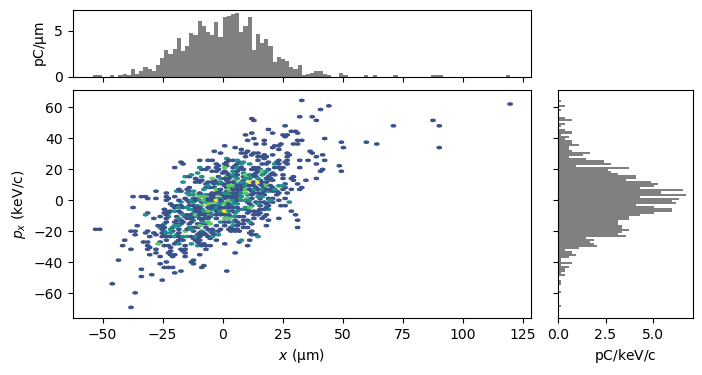

In [24]:
P.resample(1000).plot('x', 'px', bins=100)

## Units

Units can be retrieved from any computable quantitiy.
These are returned as a pmd_unit type.

In [25]:
P.units('x'), P.units('energy'), P.units('norm_emit_x'), P.units('cov_x__kinetic_energy'), P.units('norm_emit_4d')

(pmd_unit('m', 1, (1, 0, 0, 0, 0, 0, 0)),
 pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0)),
 pmd_unit('m', 1, (1, 0, 0, 0, 0, 0, 0)),
 pmd_unit('m*eV', 1.602176634e-19, (3, 1, -2, 0, 0, 0, 0)),
 pmd_unit('(m)^2', 1, (2, 0, 0, 0, 0, 0, 0)))

In [26]:
P.units('mean_energy')

pmd_unit('eV', 1.602176634e-19, (2, 1, -2, 0, 0, 0, 0))

In [27]:
str(P.units('cov_x__kinetic_energy'))

'm*eV'

## z vs t

These particles are from Bmad, at the same z and different times

In [28]:
P.std('z'), P.std('t')

(np.float64(0.0), np.float64(2.4466662184814374e-14))

Get the central time:

In [29]:
t0 = P.avg('t')
t0

np.float64(5.163879459127423e-06)

Drift all particles to this time. This operates in-place:

In [30]:
P.drift_to_t(t0)

Now these are at different z, and the same t:

In [31]:
P.std('z'), P.avg('t'), set(P.t)

(np.float64(7.334920780350132e-06),
 np.float64(5.163879459127425e-06),
 {np.float64(5.163879459127423e-06)})

## status, weight, id, copy

`status == 1` is alive, otherwise dead. Set the first ten particles to a different status.

`n_alive`, `n_dead` count these

In [32]:
P.status[0:10] = 0
P.status, P.n_alive, P.n_dead

(array([0, 0, 0, ..., 1, 1, 1], dtype=int32), 99990, 10)

There is a `.where` convenience routine to make selections easier:

In [33]:
P0 = P.where(P.status==0)
P1 = P.where(P.status==1)
len(P0), P0.charge, P1.charge

(10, np.float64(2.4999999999999994e-14), np.float64(2.4997499999999996e-10))

Copy is a deep copy:

In [34]:
P2 = P1.copy()

Charge can also be set. This will re-scale the weight array:

In [35]:
P2.charge = 9.8765e-12
P1.weight[0:2], P2.weight[0:2], P2.charge


(array([2.5e-15, 2.5e-15]),
 array([9.87748775e-17, 9.87748775e-17]),
 np.float64(9.876499999999997e-12))

Some codes provide ids for particles. If not, you can assign an id. 

In [36]:
'id' in P2

False

This will assign an id if none exists. 

In [37]:
P2.id, 'id' in P2

(array([    1,     2,     3, ..., 99988, 99989, 99990]), True)

# Writing

In [38]:
import h5py
import numpy as np

In [39]:
newh5file = 'particles.h5'

with h5py.File(newh5file, 'w') as h5:
    P.write(h5)
    
with h5py.File(newh5file, 'r') as h5:
    P2 = ParticleGroup(h5)    

Check if all are the same:

In [40]:
for key in ['x', 'px', 'y', 'py', 'z', 'pz', 't', 'status', 'weight', 'id']:
    same = np.all(P[key] == P2[key])
    print(key, same)

x True
px True
y True
py True
z True
pz True
t True
status True
weight True
id True


This does the same check:

In [41]:
P2 == P

True

Write Astra-style particles

In [42]:
P.write_astra('astra.dat')

In [43]:
!head astra.dat

  5.358867254236e-07  -2.266596025469e-08   2.743173452837e-13   5.432293116193e+02   1.634894200076e+01   7.974939693676e+09   5.163879459127e+03   0.000000000000e+00    1   -1
 -1.208904511904e-05   2.743402818288e-05  -5.473095269153e-06  -7.699432808273e+03   1.073320266862e+04   2.538945179648e+07  -1.818989403546e-12   2.500000000000e-06    1   -1
  2.500557812617e-05   1.840484451196e-06  -6.071970122807e-06   2.432464253407e+04  -2.207080331882e+03  -8.584659148073e+05  -1.818989403546e-12   2.500000000000e-06    1   -1
  1.840224855502e-06   2.319774542484e-05  -1.983837488548e-06   1.761897150333e+04  -4.269379756219e+03  -1.555244938371e+06  -1.818989403546e-12   2.500000000000e-06    1   -1
  1.282953228685e-05   2.807375273984e-06   7.759268653990e-06   1.898440718152e+04  -5.303751910566e+03  -2.614389107333e+06  -1.818989403546e-12   2.500000000000e-06    1   -1
  3.362374691900e-06   4.796982704111e-06  -1.006752695161e-06   1.012222041635e+04   1.266876546973e+04  -1.8

Optionally, a string can be given:

In [44]:
P.write('particles.h5')

# Plot

Some plotting is included for convenience. See plot_examples.ipynb for better plotting. 

## 1D density plot

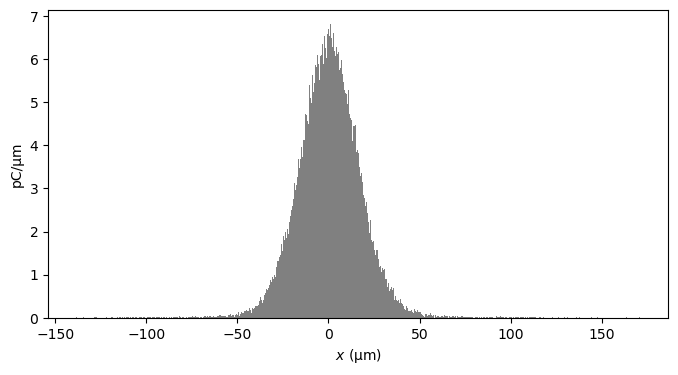

In [45]:
P.plot('x')

## Slice statistic plot

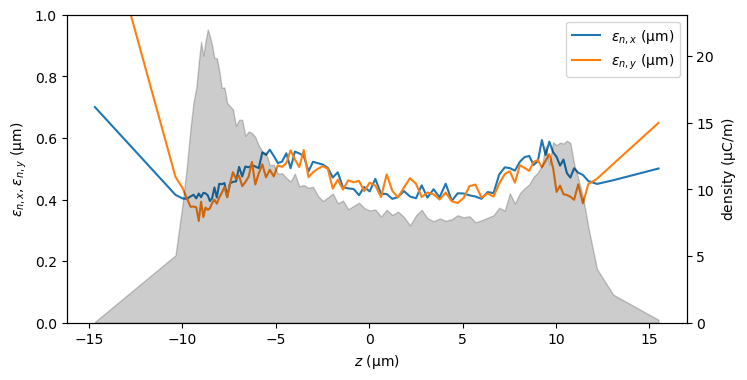

In [46]:
P.slice_plot('norm_emit_x', 'norm_emit_y', ylim=(0, 1e-6))

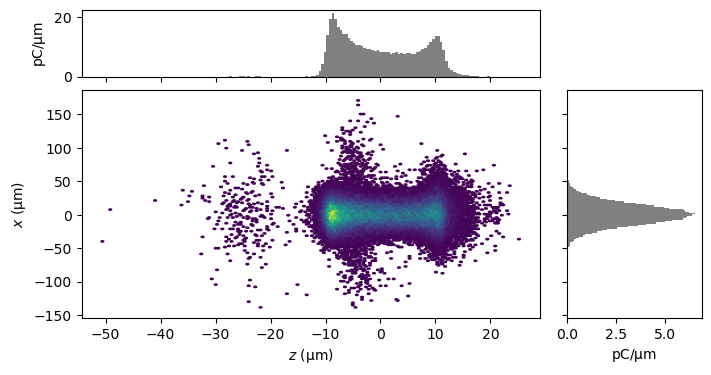

In [47]:
P.plot('z', 'x')

Any other key that returbs an arrat can be sliced on

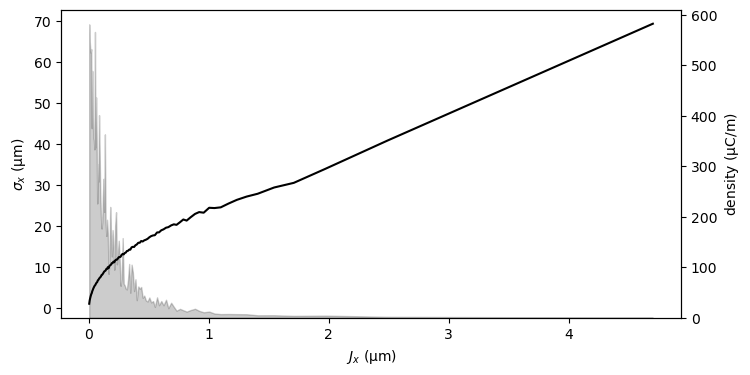

In [48]:
P.slice_plot('sigma_x', slice_key = 'Jx')

## 2D density plot

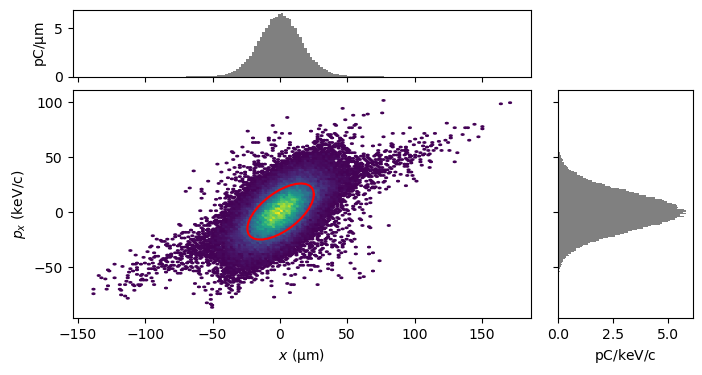

In [49]:
P.plot('x', 'px', ellipse=True)

Optionally the figure object can be returned, and the plot further modified.

(-50.0, 50.0)

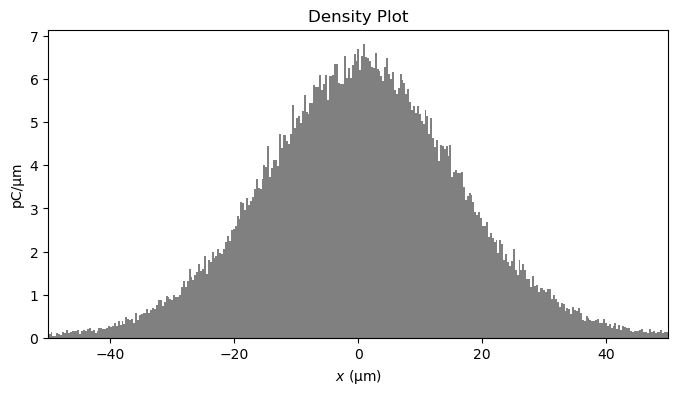

In [50]:
fig = P.plot('x', return_figure=True)
ax = fig.axes[0]
ax.set_title('Density Plot')
ax.set_xlim(-50, 50)

## Manual plotting

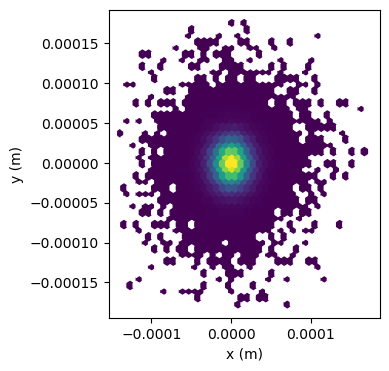

In [51]:
import copy

fig, ax = plt.subplots()
ax.set_aspect('equal')
xkey = 'x'
ykey = 'y'
datx = P[xkey]
daty = P[ykey]
ax.set_xlabel(f'{xkey} ({P.units(xkey)})')
ax.set_ylabel(f'{ykey} ({P.units(ykey)})')

cmap = copy.copy(plt.get_cmap('viridis'))
cmap.set_under('white')
ax.hexbin(datx, daty, gridsize=40, cmap=cmap, vmin=1e-15)

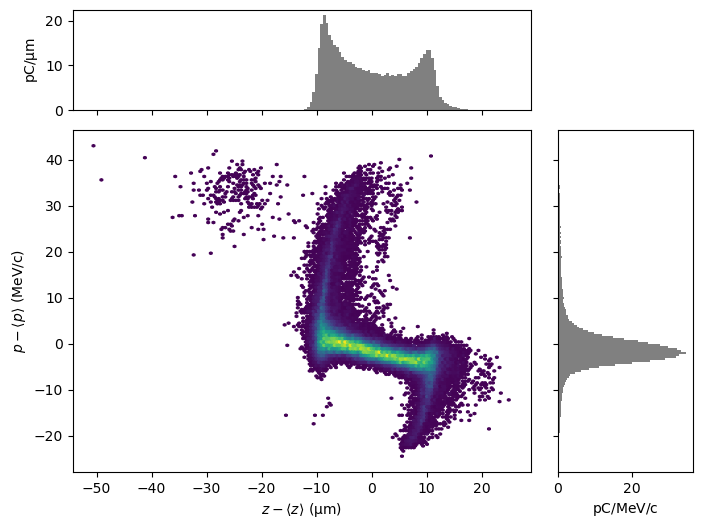

In [52]:
P.plot('delta_z', 'delta_p', figsize=(8,6))

## Manual binning and plotting

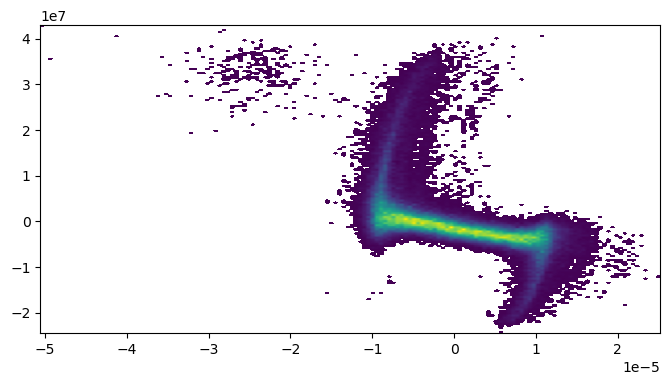

In [53]:
H, edges = P.histogramdd('delta_z', 'delta_p', bins=(150, 150))
extent = [edges[0].min(),edges[0].max(),edges[1].min(),edges[1].max() ]

plt.imshow(H.T, origin='lower', extent = extent, aspect='auto', vmin=1e-15, cmap=cmap)

# Multiple ParticleGroup in an HDF5 file

This example has two particlegroups. This also shows how to examine the components, without loading the full data.


In [54]:
from pmd_beamphysics import particle_paths
from pmd_beamphysics.readers import all_components, component_str

H5FILE = 'data/astra_particles.h5'
h5 = h5py.File(H5FILE, 'r')

Get the valid paths

In [55]:
ppaths = particle_paths(h5)
ppaths

['/screen/0/./', '/screen/1/./']

Search for all valid components in a single path

In [56]:
ph5 = h5[ppaths[0]]
all_components(ph5 )

['momentum/x',
 'momentum/y',
 'momentum/z',
 'momentumOffset/z',
 'particleStatus',
 'position/x',
 'position/y',
 'position/z',
 'positionOffset/z',
 'time',
 'timeOffset',
 'weight']

Get some info

In [57]:
for component in all_components(ph5):
    info = component_str(ph5, component)
    print(info)

momentum/x [998 items] is a momentum with units: kg*m/s
momentum/y [998 items] is a momentum with units: kg*m/s
momentum/z [998 items] is a momentum with units: kg*m/s
momentumOffset/z [constant 4.660805218675275e-22 with shape 998] is a momentum with units: kg*m/s
particleStatus [998 items]
position/x [998 items] is a length with units: m
position/y [998 items] is a length with units: m
position/z [998 items] is a length with units: m
positionOffset/z [constant 0.50013 with shape 998] is a length with units: m
time [998 items] is a time with units: s
timeOffset [constant 2.0826e-09 with shape 998] is a time with units: s
weight [998 items] is a charge with units: C


# Cleanup

In [58]:
import os

os.remove('astra.dat')
os.remove(newh5file)
os.remove('elegant_particles.txt')